In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm

# scipy
from scipy.spatial.distance import pdist

# scikit
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.manifold import MDS
from sklearn.manifold import TSNE
from sklearn.datasets import load_iris
from sklearn import metrics
from sklearn.cluster import KMeans

In [5]:
PROJECT = "ba820-329602"
SQL = "SELECT * from `questrom.datasets.wine`"
wine = pd.read_gbq(SQL, PROJECT)

In [7]:
wine.sample(3)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
349,6.4,0.795,0.00,2.2,0.065,28.0,52.0,0.99378,3.49,0.52,11.6,5
28,7.5,0.380,0.48,2.6,0.073,22.0,84.0,0.99720,3.32,0.70,9.6,4
553,7.4,0.610,0.01,2.0,0.074,13.0,38.0,0.99748,3.48,0.65,9.8,5


In [8]:
Y=wine['quality']
X=wine.drop('quality', axis=1)

In [9]:
Y

0       3
1       3
2       3
3       3
4       3
       ..
1594    8
1595    8
1596    8
1597    8
1598    8
Name: quality, Length: 1599, dtype: int64

In [10]:
X

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,11.6,0.580,0.66,2.20,0.074,10.0,47.0,1.00080,3.25,0.57,9.0
1,8.3,1.020,0.02,3.40,0.084,6.0,11.0,0.99892,3.48,0.49,11.0
2,7.3,0.980,0.05,2.10,0.061,20.0,49.0,0.99705,3.31,0.55,9.7
3,7.1,0.875,0.05,5.70,0.082,3.0,14.0,0.99808,3.40,0.52,10.2
4,7.4,1.185,0.00,4.25,0.097,5.0,14.0,0.99660,3.63,0.54,10.7
...,...,...,...,...,...,...,...,...,...,...,...
1594,10.0,0.260,0.54,1.90,0.083,42.0,74.0,0.99451,2.98,0.63,11.8
1595,7.9,0.350,0.46,3.60,0.078,15.0,37.0,0.99730,3.35,0.86,12.8
1596,7.4,0.360,0.30,1.80,0.074,17.0,24.0,0.99419,3.24,0.70,11.4
1597,5.6,0.850,0.05,1.40,0.045,12.0,88.0,0.99240,3.56,0.82,12.9


In [12]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

array([[0.61946903, 0.31506849, 0.66      , ..., 0.4015748 , 0.14371257,
        0.09230769],
       [0.32743363, 0.61643836, 0.02      , ..., 0.58267717, 0.09580838,
        0.4       ],
       [0.23893805, 0.5890411 , 0.05      , ..., 0.4488189 , 0.13173653,
        0.2       ],
       ...,
       [0.24778761, 0.16438356, 0.3       , ..., 0.39370079, 0.22155689,
        0.46153846],
       [0.08849558, 0.5       , 0.05      , ..., 0.64566929, 0.29341317,
        0.69230769],
       [0.59292035, 0.34246575, 0.67      , ..., 0.37795276, 0.21556886,
        0.76923077]])

In [13]:
pca = PCA()
pcs = pca.fit_transform(X)

In [14]:
varexp = pca.explained_variance_ratio_
varexp

array([0.35752287, 0.1942533 , 0.15046322, 0.07232142, 0.05324329,
       0.05165235, 0.04082676, 0.03497313, 0.02418984, 0.01467923,
       0.00587459])

C:\ProgramData\Anaconda3\envs\ba820\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


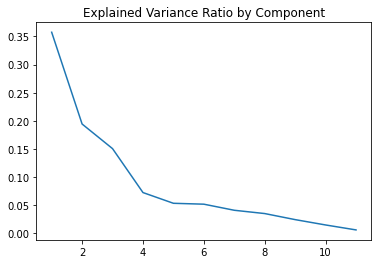

In [15]:
#plot
plt.title("Explained Variance Ratio by Component")
sns.lineplot(range(1,len(varexp)+1), varexp)
plt.show()

C:\ProgramData\Anaconda3\envs\ba820\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


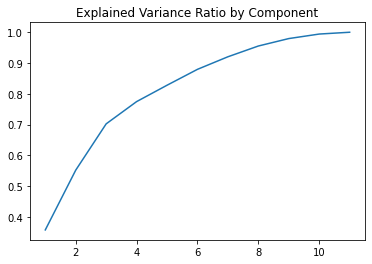

In [18]:
#Cum
#plot
plt.title("Explained Variance Ratio by Component")
sns.lineplot(range(1,len(varexp)+1), np.cumsum(varexp))
plt.show()

C:\ProgramData\Anaconda3\envs\ba820\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


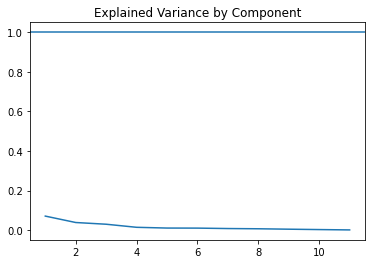

In [19]:
expl_var = pca.explained_variance_
plt.title("Explained Variance by Component")
sns.lineplot(range(1,len(varexp)+1), expl_var)
plt.axhline(1)
plt.show()

In [24]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=4)
clf = clf.fit(X, Y)

[Text(167.4, 195.696, 'X[10] <= 0.285\ngini = 0.643\nsamples = 1599\nvalue = [10, 53, 681, 638, 199, 18]'),
 Text(83.7, 152.208, 'X[9] <= 0.147\ngini = 0.523\nsamples = 842\nvalue = [7, 29, 519, 260, 25, 2]'),
 Text(41.85, 108.72, 'X[6] <= 0.327\ngini = 0.411\nsamples = 353\nvalue = [4, 19, 262, 66, 2, 0]'),
 Text(20.925, 65.232, 'X[10] <= 0.208\ngini = 0.454\nsamples = 298\nvalue = [4, 19, 210, 63, 2, 0]'),
 Text(10.4625, 21.744, 'gini = 0.39\nsamples = 206\nvalue = [2, 14, 157, 32, 1, 0]'),
 Text(31.387500000000003, 21.744, 'gini = 0.551\nsamples = 92\nvalue = [2, 5, 53, 31, 1, 0]'),
 Text(62.775000000000006, 65.232, 'X[4] <= 0.101\ngini = 0.103\nsamples = 55\nvalue = [0, 0, 52, 3, 0, 0]'),
 Text(52.3125, 21.744, 'gini = 0.408\nsamples = 7\nvalue = [0, 0, 5, 2, 0, 0]'),
 Text(73.2375, 21.744, 'gini = 0.041\nsamples = 48\nvalue = [0, 0, 47, 1, 0, 0]'),
 Text(125.55000000000001, 108.72, 'X[6] <= 0.267\ngini = 0.564\nsamples = 489\nvalue = [3, 10, 257, 194, 23, 2]'),
 Text(104.625, 65.2

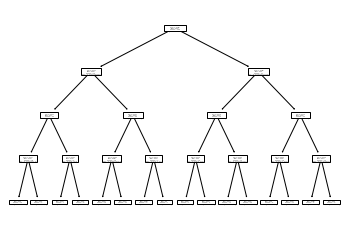

In [25]:
tree.plot_tree(clf)

In [26]:
preds = clf.predict(X)

In [27]:
metrics.accuracy_score(Y, preds)

0.6303939962476548